In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [ ]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 35 kB/s 


In [ ]:
import easyocr

In [ ]:
from google.colab import files
files.upload()

Saving image6.jpg to image6.jpg
Saving image5.jpg to image5.jpg
Saving image4.jpg to image4.jpg
Saving image3.jpg to image3.jpg
Saving image2.jpg to image2.jpg
Saving image1.jpg to image1.jpg


{'image1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x005\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x08\x05\x05\x05\x06\x05\x08\x06\x06\x08\x0b\x07\x06\x07\x0b\r\t\x08\x08\t\r\x0f\x0c\x0c\r\x0c\x0c\x0f\x11\x0c\x0c\x0c\x0c\x0c\x0c\x11\x0e\x11\x11\x12\x11\x11\x0e\x17\x17\x18\x18\x17\x17     $$$$$$$$$$\x01\x08\x08\x08\x0f\x0e\x0f\x1c\x13\x13\x1c\x1f\x19\x14\x19\x1f$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc0\x00\x11\x08\x01\xc9\x02\x8a\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xb5\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\x08\x01\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x10\x00\x02\x01\x03\x03\x01\x05\x04\x06\x08\x02\x07\x06\x05\x01\t\x01\x02\x03\x00\x11\x04!\x12\x051AQ"\x13\x06aq\x812\x91\xa1\xb1B\x14\x07\xc1\xd1Rbr#3\x15\x82\x92\xe1\xb2\xc2CS$4\xf0\xa

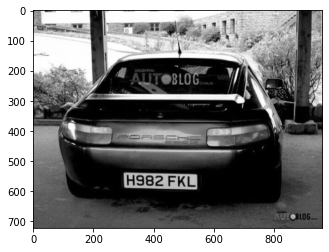

In [ ]:
img=cv2.imread('image4.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

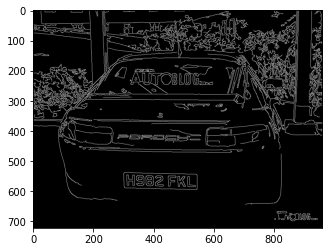

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11,17,17) 
edged= cv2.Canny(bfilter, 30,200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break

In [ ]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

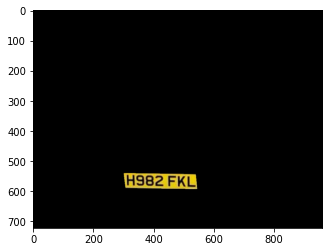

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

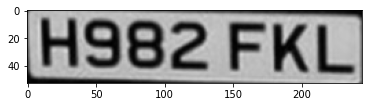

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778047590311)]

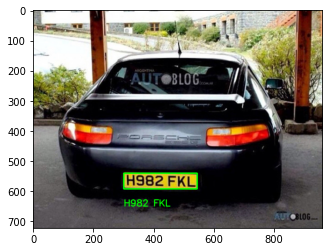

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))